##### [실습] titanic 승객 데이터 활용

**컬럼 설명** 
- PassengerId - 승객 고유번호
- Survived - 생존유무(target 값) (0 = 사망, 1 = 생존)
- Pclass - 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - 탑승객 성명
- Sex - 성별 (male: 남성, female: 여성)
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Ticket - 티켓 넘버
- Fare - 탑승 요금
- Cabin - 객실 넘버
- Embarked - 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)

In [6]:
# titanic.csv 파일 로드
# titanic 데이터셋의 메타 데이터 확인
import pandas as pd

titanic = pd.read_csv('data/titanic.csv')

print(titanic.shape)       # 행, 열의 개수
print(titanic.columns)     # 컬럼명 리스트


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


- 기초문제

In [8]:
# 1. 전체 승객 중 생존자의 수와 사망자의 수를 구하여 출력

import pandas as pd

# 파일 로드
titanic = pd.read_csv('data/titanic.csv')

# 생존자(1), 사망자(0) 수 세기
survival_counts = titanic['Survived'].value_counts()

# 출력
print('사망자 수 (0):', survival_counts[0])
print('생존자 수 (1):', survival_counts[1])


사망자 수 (0): 549
생존자 수 (1): 342


In [11]:
# 2. 승객 나이의 평균 출력

import pandas as pd

# titanic.csv 불러오기
titanic = pd.read_csv('data/titanic.csv')

# 나이의 평균 계산
average_age = titanic['Age'].mean()

print('승객 나이의 평균: {:.1f}'.format(average_age))



승객 나이의 평균: 29.7


In [12]:
# 3. 1등급 승객 중 운임이 가장 높은 승객의 이름 출력


# 1등급 승객 중에서 운임이 가장 높은 행 찾기
first_class = titanic[titanic['Pclass'] == 1]
max_fare_row = first_class.loc[first_class['Fare'].idxmax()]

# 승객 이름 출력
print('1등급 승객 중 운임이 가장 높은 승객의 이름:', max_fare_row['Name'])


1등급 승객 중 운임이 가장 높은 승객의 이름: Ward, Miss. Anna


In [13]:
# 4. 여성 승객의 수를 구하여 출력

# 여성 승객만 필터한 뒤 개수 세기
num_females = titanic[titanic['Sex'] == 'female'].shape[0]

print('여성 승객의 수:', num_females)

여성 승객의 수: 314


In [14]:
# 5. 운임이 50 이상인 승객의 이름과 운임 출력

# 운임이 50 이상인 승객 추출
high_fare = titanic[titanic['Fare'] >= 50]

# 이름과 운임 컬럼만 출력
print(high_fare[['Name', 'Fare']])


                                                  Name      Fare
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   71.2833
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   53.1000
6                              McCarthy, Mr. Timothy J   51.8625
27                      Fortune, Mr. Charles Alexander  263.0000
31      Spencer, Mrs. William Augustus (Marie Eugenie)  146.5208
..                                                 ...       ...
856         Wick, Mrs. George Dennick (Mary Hitchcock)  164.8667
863                  Sage, Miss. Dorothy Edith "Dolly"   69.5500
867               Roebling, Mr. Washington Augustus II   50.4958
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   52.5542
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   83.1583

[161 rows x 2 columns]


In [ ]:
# 6. 나이가 18세 미만인 승객들의 생존율을 계산하여 출력

under_18 = titanic[titanic['Age'] < 18]

# 생존율 계산: 생존자 수 / 전체 인원 * 100
survival_rate = (under_18['Survived'].sum() / len(under_18)) * 100

print(f'나이 18세 미만 승객들의 생존율: {survival_rate:.1f}%')


나이 18세 미만 승객들의 생존율: 54.0%


In [20]:
# 7. 2등급 객실에 탑승한 승객의 평균 운임을 계산하여 출력

# 2등급 객실 승객만 추출
pclass2 = titanic[titanic['Pclass'] == 2]

# 평균 운임 계산
mean_fare = pclass2['Fare'].mean()

print(f'2등급 객실 승객의 평균 운임: {mean_fare:.2f}')


2등급 객실 승객의 평균 운임: 20.66


In [ ]:
# 10세 단위로 생존률을 시각화 해줘


In [21]:
# 8. 승객 중 나이가 가장 많은 사람의 나이와 이름을 출력


# 나이가 가장 많은 값 찾기
max_age = titanic['Age'].max()

# 나이가 가장 많은 사람(들) 정보 추출
oldest = titanic[titanic['Age'] == max_age]

# 이름과 나이 출력
print(oldest[['Name', 'Age']])


                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


In [27]:
# 9. S 항구에서 탑승한 승객의 수를 출력

em_s= titanic[titanic['Embarked'] == 'S'].shape[0]

print(em_s)

644


In [37]:
# 10. 3등급 객실에 탑승한 남성 승객 중 생존자의 수를 출력
survival_3m = titanic[(titanic['Pclass']== 3) & (titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]
print(len(survival_3m))


47


- 고급문제

In [38]:
# 1. 생존자(Survived)와 그렇지 않은 사람들의 `Pclass`(객실 등급)별 평균 나이를 각각 출력
# 생존여부(Survived), Pclass별 평균나이
mean_ages = titanic.groupby(['Survived', 'Pclass'])['Age'].mean()
print(mean_ages)


Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64


In [40]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


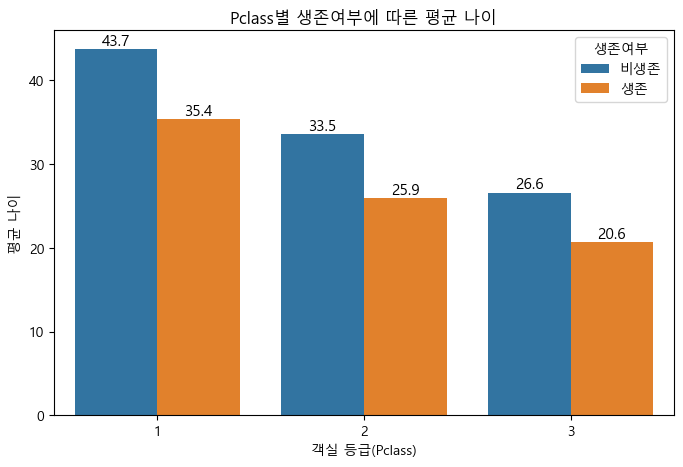

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 가공
mean_ages = titanic.groupby(['Survived', 'Pclass'])['Age'].mean().reset_index()
mean_ages['Survived'] = mean_ages['Survived'].map({0: '비생존', 1: '생존'})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=mean_ages, x='Pclass', y='Age', hue='Survived')

plt.title('Pclass별 생존여부에 따른 평균 나이')
plt.xlabel('객실 등급(Pclass)')
plt.ylabel('평균 나이')
plt.legend(title='생존여부')

# ---- 막대 위에 숫자 표시 코드 추가 ---- #
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # 0 이상인 patch(실제로 데이터 있는 부분)만 표시
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=11, color='black')


plt.show()


In [35]:
# 2. `SibSp`(형제/배우자 수)가 3 이상인 승객들 중에서, `Fare`(운임) 상위 5명의 이름과 나이를 출력

In [36]:
# 3. 승객 중에서 `Age` 값이 결측치(NaN)인 사람들의 `Embarked`(탑승 항구)별 분포를 출력

In [37]:
# 4. 나이가 16세 미만이고, 혼자 탑승한(`SibSp == 0` and `Parch == 0`) 승객의 이름과 성별, 생존 여부를 출력

In [38]:
# 5. 1등급(Pclass == 1) 객실에 탑승한 승객들 중에서, 운임(Fare)이 평균보다 높은 사람들의 이름과 나이, 운임을 출력

In [39]:
# 6. 나이(Age), 객실 등급(Pclass), 운임(Fare) 값에 결측치가 없는 승객들만 대상으로, 각 등급별 평균 운임과 중앙값 운임을 출력

In [40]:
# 7. 승객들의 `Embarked` 별 평균 나이를 계산하고, 가장 많은 승객이 탑승한 항구를 기준으로 생존율을 계산하여 출력

In [41]:
# 8. 승객 중에서 여성(`Sex == 'female'`)이면서 30세 이상인 사람들의 생존율을 계산하여 출력

In [42]:
# 9. 동반한 형제 또는 배우자 수(`SibSp`)와 부모 또는 자녀 수(`Parch`)의 합이 3 이상인 승객들만을 대상으로, 그들의 생존율을 계산하여 출력

In [43]:
# 10. `Cabin`(객실 번호) 정보가 있는 승객들만을 대상으로, 그들의 생존율을 객실 등급별로 구분하여 계산하여 출력